In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Prepare Dataset

In [2]:
dataset_path = './Text_PreprocessingV2_Merged_Dataset.csv'

In [3]:
df = pd.read_csv(dataset_path, sep=',', header=None, skiprows=1)

# test_df.columns = ['text', 'label']
df.columns = ["label", "tweet_tokens_stemmed"]

In [4]:
df.head(10)

,label,tweet_tokens_stemmed
0,2,"['warung', 'milik', 'usaha', 'pabrik', 'puluh'..."
1,0,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',..."
2,2,"['lokasi', 'strategis', 'jalan', 'sumatera', '..."
3,2,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba..."
4,1,"['duh', 'mahasiswa', 'sombong', 'kasih', 'kart..."
5,2,"['makan', 'agam', 'harga', 'makan', 'food', 's..."
6,1,"['pakai', 'kartu', 'kredit', 'baca', 'untung',..."
7,2,"['unik', 'bagus', 'foto', 'makan', 'enak', 'pe..."
8,2,"['keluarga', 'nikmat', 'alam', 'kuliner', 'sen..."
9,2,['syukur']


In [5]:
jumlah_positives = (df['label'] == 2).sum()
print(f'Jumlah review positif: {jumlah_positives}')

jumlah_negatives = (df['label'] == 1).sum()
print(f'Jumlah review negatif: {jumlah_negatives}')

Jumlah review positif: 7151
Jumlah review negatif: 3830


## Preprocessing

In [6]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
df["tweet_join"] = df["tweet_tokens_stemmed"].apply(join_text_list)

df["tweet_join"].head()

0    warung milik usaha pabrik puluh kenal putih ba...
1    mohon ulama lurus mmbri hujjah partai diwlh su...
2    lokasi strategis jalan sumatera bandung nyaman...
3    betapa bahagia unboxing paket barang bagus tet...
4    duh mahasiswa sombong kasih kartu kuning ajar ...
Name: tweet_join, dtype: object

In [7]:
df

,label,tweet_tokens_stemmed,tweet_join
0,2,"['warung', 'milik', 'usaha', 'pabrik', 'puluh'...",warung milik usaha pabrik puluh kenal putih ba...
1,0,"['mohon', 'ulama', 'lurus', 'mmbri', 'hujjah',...",mohon ulama lurus mmbri hujjah partai diwlh su...
2,2,"['lokasi', 'strategis', 'jalan', 'sumatera', '...",lokasi strategis jalan sumatera bandung nyaman...
3,2,"['betapa', 'bahagia', 'unboxing', 'paket', 'ba...",betapa bahagia unboxing paket barang bagus tet...
4,1,"['duh', 'mahasiswa', 'sombong', 'kasih', 'kart...",duh mahasiswa sombong kasih kartu kuning ajar ...
...,...,...,...
12255,1,"['film', 'tncfu', 'cocok', 'tonton', 'suka', '...",film tncfu cocok tonton suka sadis
12256,1,"['indihome', 'mahal', 'bayar', 'tangan', 'lamb...",indihome mahal bayar tangan lambat
12257,1,"['be', 'dek', 'gea', 'cowok', 'cupu', 'takut',...",be dek gea cowok cupu takut pacar pacar tingga...
12258,1,"['valen', 'kualitas', 'konentator', 'didik', '...",valen kualitas konentator didik jebret jebret ...


## Split Dataset

In [8]:
# Filter DataFrame untuk label 1 dan 2
df_filtered = df[df['label'].isin([1, 2])]

# Perbarui label sehingga label 1 menjadi 0 dan label 2 menjadi 1
df_filtered.loc[:, 'label'] = df_filtered['label'].map({1: 0, 2: 1})


# Split dataset menjadi fitur (X) dan label (y)
X = df_filtered['tweet_join']
y = df_filtered['label']


In [9]:
## Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## TFiDF

In [10]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_features=50, min_df=1,
                        norm='l2', ngram_range=(1,2))
X_train_tfdf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

In [11]:
len(vectorizer.get_feature_names_out()), vectorizer.get_feature_names_out()[0:20]

(50,
 array(['ayam', 'bagus', 'bakar', 'bandung', 'banget', 'coba', 'cocok',
        'deh', 'enak', 'goreng', 'harga', 'jalan', 'jangkau', 'kafe',
        'kali', 'keluarga', 'khas', 'kota', 'layan', 'lokasi'],
       dtype=object))

In [12]:
X_train_tfdf.shape

(8784, 50)

In [13]:
# Ambil contoh kalimat dari sampel data
sample_index = 0  # Misalnya kita ambil sampel pertama
sample_sentence = X_train.iloc[sample_index]

# Transformasikan kalimat menjadi representasi TF-IDF
sample_tfidf_representation = vectorizer.transform([sample_sentence]).toarray()

print("Kalimat Asli:")
print(sample_sentence)
print("\nRepresentasi TF-IDF:")
print(sample_tfidf_representation)


Kalimat Asli:
jalan mudah arah padma hotel resto benarbenar nyaman luas makan malam raya ulang kejut pribadi makan malam layan super ramah lantai layan ramah bolak turun bawa pesan makan

Representasi TF-IDF:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.30581877
  0.         0.         0.         0.         0.         0.
  0.46358116 0.         0.         0.         0.34261662 0.
  0.51412666 0.         0.         0.         0.         0.
  0.         0.29114643 0.         0.         0.         0.3305075
  0.         0.         0.         0.         0.34037268 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]


## Percobaan 2 Kelas

In [14]:
print (X_train_tfdf.shape)
print (y_train.shape)
print (X_test_tfidf.shape)
print (y_test.shape)

(8784, 50)
(8784,)
(2197, 50)
(2197,)


In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

filters = 64
kernel_size = 5

# Buat dan latih model CNN
model2 = Sequential([
    Conv1D(64, 5, activation='relu', input_shape=(X_train_tfdf.shape[1], 1)),
    MaxPooling1D(pool_size=4),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Menggunakan 1 neuron dan aktivasi sigmoid
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 46, 64)            │        384 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 11, 64)            │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv1d_1 (Conv1D)               │ (None, 7, 128)            │     41,088 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ global_max_pooling1d            │ (None, 128)               │          0 │
│ (GlobalMaxPooling1D)            │                           │            │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │         65 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 49,793 (194.50 KB)

 Trainable params: 49,793 (194.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:

# Melatih model
history = model2.fit(
    X_train_tfdf, 
    y_train, epochs=10,
    validation_data=(X_test_tfidf, y_test)
)

Epoch 1/10


275/275 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7420 - loss: 0.5508 - val_accuracy: 0.7997 - val_loss: 0.4633
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8156 - loss: 0.4549 - val_accuracy: 0.8097 - val_loss: 0.4534
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8246 - loss: 0.4283 - val_accuracy: 0.8066 - val_loss: 0.4542
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8222 - loss: 0.4368 - val_accuracy: 0.8084 - val_loss: 0.4413
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8283 - loss: 0.4315 - val_accuracy: 0.8143 - val_loss: 0.4397
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8266 - loss: 0.4258 - val_accuracy: 0.8138 - val_loss: 0.4379
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8262 - loss: 0.4258 - val_accuracy: 0.8125 - val_loss: 0.4336
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8348 - loss: 0.4204 - val_accuracy: 0.8134 - val_

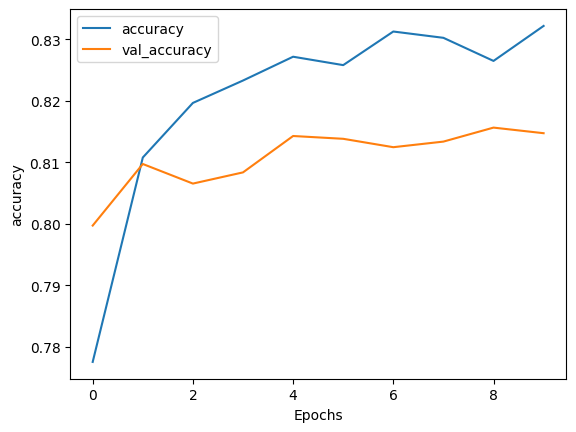

In [18]:

# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")

In [25]:
# Konversi probabilitas menjadi label sentimen
def convert_to_sentiment_label(probabilities):
    # Jika probabilitas lebih dari 0.5, prediksi sebagai kelas positif (label 1),
    # jika tidak, prediksi sebagai kelas negatif (label 0)
    if probabilities > 0.5:
        return "Positif"
    else:
        return "Negatif"

# Kalimat untuk diuji
sentence = "jokowi adalah presiden yang baik dan bijaksana"

# Lakukan transformasi TF-IDF pada kalimat
sentence_vectorized2 = vectorizer.transform([sentence]).toarray()

# Lakukan prediksi sentimen menggunakan model yang telah dilatih
prediction2 = model2.predict(sentence_vectorized2)

# Konversi probabilitas menjadi label sentimen
sentiment_label = convert_to_sentiment_label(prediction2[0])

# Tampilkan hasil prediksi
print("Probabilitas untuk kelas Positif:", prediction2)
print("Probabilitas untuk kelas Negatif:", 1 - prediction2)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Probabilitas untuk kelas Positif: [[0.23752742]]
Probabilitas untuk kelas Negatif: [[0.76247257]]


In [26]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model2.predict(X_test_tfidf)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mencetak classification report
print(classification_report(y_test, y_pred_classes))

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.35      1.00      0.52       764
           1       0.00      0.00      0.00      1433

    accuracy                           0.35      2197
   macro avg       0.17      0.50      0.26      2197
weighted avg       0.12      0.35      0.18      2197



c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo